In [1]:
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
from obspy.core.trace import Trace

### Functions to reading `ct` or `ctn` files

In [2]:
def read_ct_files(path):
    f = open(path)
    lines = f.readlines()
    print("===== Iniciando lectura del archivo ====")
    t, S1, S2, A3, A4 = [], [], [], [], []
    for i, line in enumerate(lines[4:-1]):
        #print(line)
        line_data = line.replace("\n","").split("|")[:-1]
        #print(line_data)
        S1.append(float(line_data[1]))
        S2.append(float(line_data[2]))
        A3.append(float(line_data[3]))
        A4.append(float(line_data[4]))
    f.close()
    print("...archivo leido...")
    return np.asarray(S1), np.asarray(S2), np.asarray(A3), np.asarray(A4)

### Leyendo los archivos

In [3]:
dir_path = r".\data\profundidad_-.ctn"
S1, S2, A3, A4 = read_ct_files(dir_path)

===== Iniciando lectura del archivo ====
...archivo leido...


### Setear Frecuencia de muestreo

In [4]:
# Set the sampling rate
sampling_rate = 50000

T = 1 / sampling_rate
# Creating the time array
t = np.arange(start = 0, stop = T*(len(S1)), step = T)
t_ms = t*1000 # Miliseconds time

### Functions plot

In [5]:
def plot_2superpositioned_signals(ax, x1, y1, x2, y2, title = "grafica",
                                  xlabel = "tiempo",
                                  ylabel = "Amplitud",
                                  fontsize_title = 22,
                                  fontsize_xlabel = 16,
                                  fontsize_ylabel = 18):
    ax.plot(x1, y1, c='r')
    ax.plot(x2, y2, c='b')
    ax.set_title(title, fontsize = fontsize_title)
    ax.set_xlabel(xlabel, fontsize = fontsize_xlabel)
    ax.set_ylabel(ylabel, fontsize = fontsize_ylabel)

In [6]:
def plot_1signal(ax, x, y, title = "grafica",
                           xlabel = "tiempo",
                           ylabel = "Amplitud",
                           fontsize_title = 22,
                           fontsize_xlabel = 16,
                           fontsize_ylabel = 18):
    ax.plot(x, y, c='blue')
    ax.set_title(title, fontsize = fontsize_title)
    ax.set_xlabel(xlabel, fontsize = fontsize_xlabel)
    ax.set_ylabel(ylabel, fontsize = fontsize_ylabel)

### Graficando strain gages

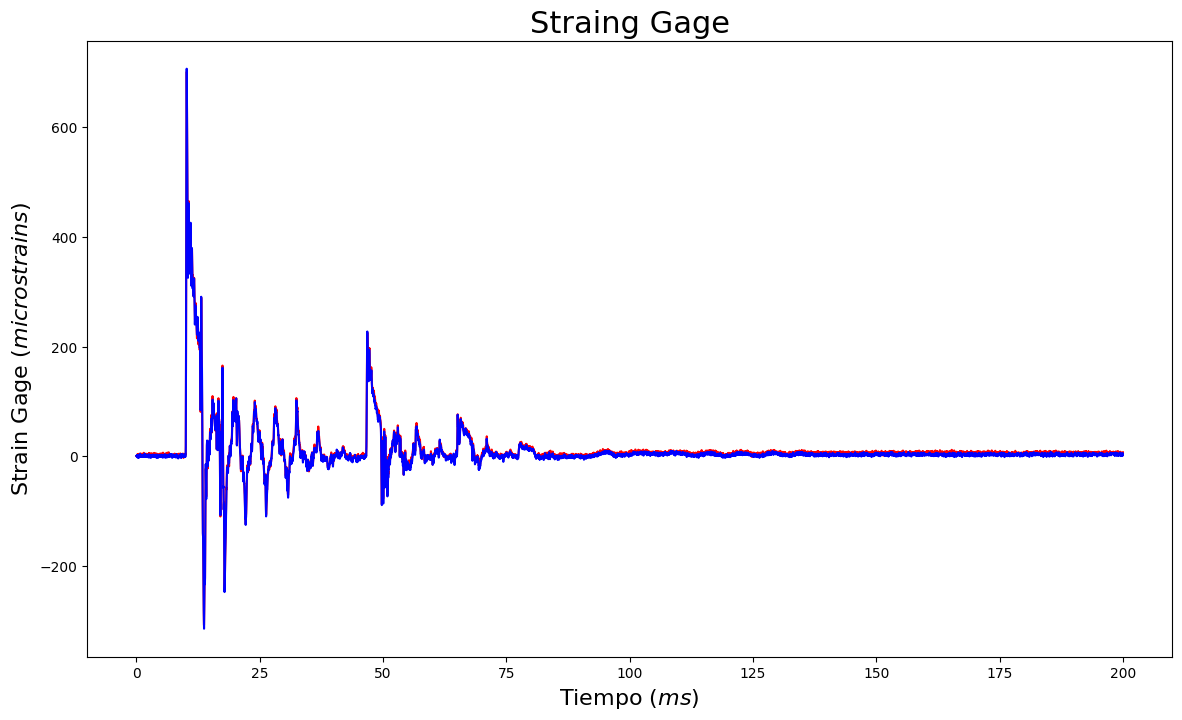

In [7]:
# 
figsize_2superpositioned_signals = (14, 8)
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Tiempo $(ms)$'


fig, ax = plt.subplots(1, 1, figsize = figsize_2superpositioned_signals)
title = "Straing Gage"
ylabel = r'Strain Gage $(micro strains)$'

plot_2superpositioned_signals(ax, t_ms, S1, t_ms, S2, title = title,
                              xlabel = xlabel,
                              ylabel = ylabel,
                              fontsize_title = fontsize_title,
                              fontsize_xlabel = fontsize_xlabel,
                              fontsize_ylabel = fontsize_ylabel)

### Graficando Acelerometros

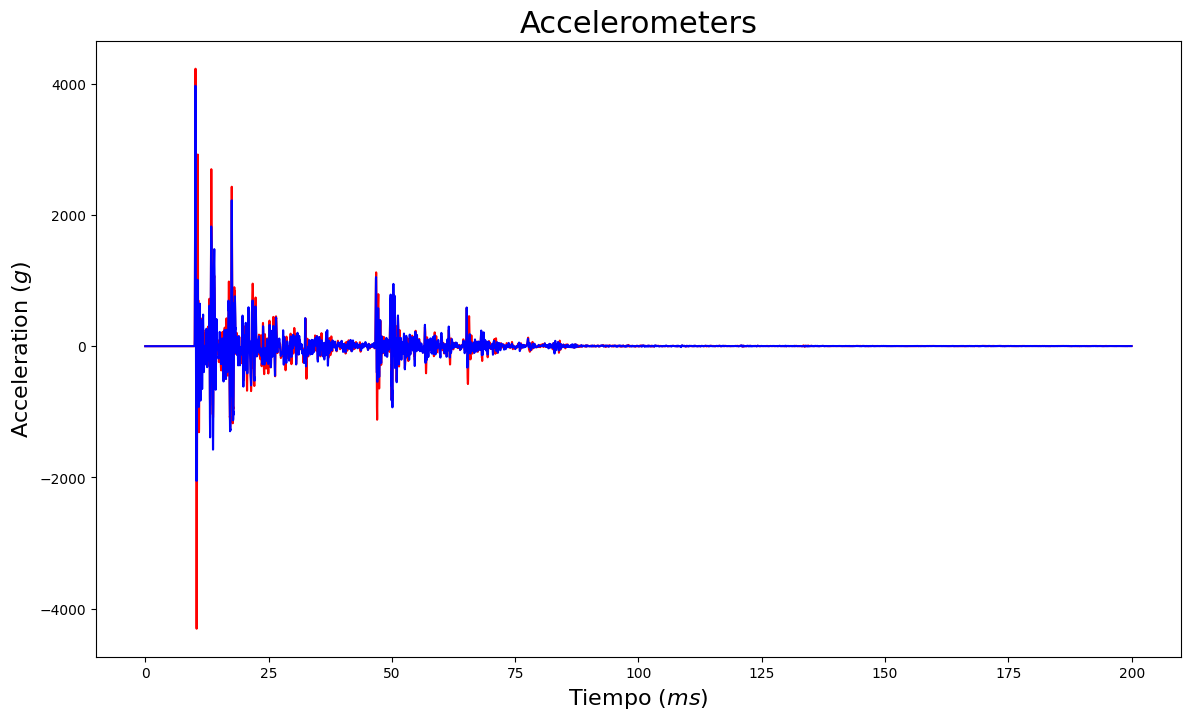

In [8]:
fig, ax = plt.subplots(1, 1, figsize = figsize_2superpositioned_signals)
title = "Accelerometers"
ylabel = r'Acceleration $(g)$'

plot_2superpositioned_signals(ax, t_ms, A3, t_ms, A4, title = title,
                              xlabel = xlabel,
                              ylabel = ylabel,
                              fontsize_title = fontsize_title,
                              fontsize_xlabel = fontsize_xlabel,
                              fontsize_ylabel = fontsize_ylabel)

### Nyquist-Shannon Theorem

$$
F_{s} > 2 F_{max}
$$

In our case the sampling rate is:
$$
F_{s} = \text{50000 Hz}
$$

### Fast Fourier Transform Function Original Signals

In [9]:
def fast_fourier_analysis(signal, T = 0.00002):
    n = len(signal) # Number of points
    fourier_signal = np.fft.fft(signal, n)
    freqs = (1/(T*n))*np.arange(n)
    psd = fourier_signal * np.conj(fourier_signal) / n
    return fourier_signal, freqs, psd

In [10]:
S1_fourier_signal, S1_freqs, S1_psd = fast_fourier_analysis(S1, T = T)
S2_fourier_signal, S2_freqs, S2_psd = fast_fourier_analysis(S2, T = T)
A3_fourier_signal, A3_freqs, A3_psd = fast_fourier_analysis(A3, T = T)
A4_fourier_signal, A4_freqs, A4_psd = fast_fourier_analysis(A4, T = T)

### Graficando Fourier de los Strain Gages

C:\Users\Jose\anaconda3\envs\kallpa_v1\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


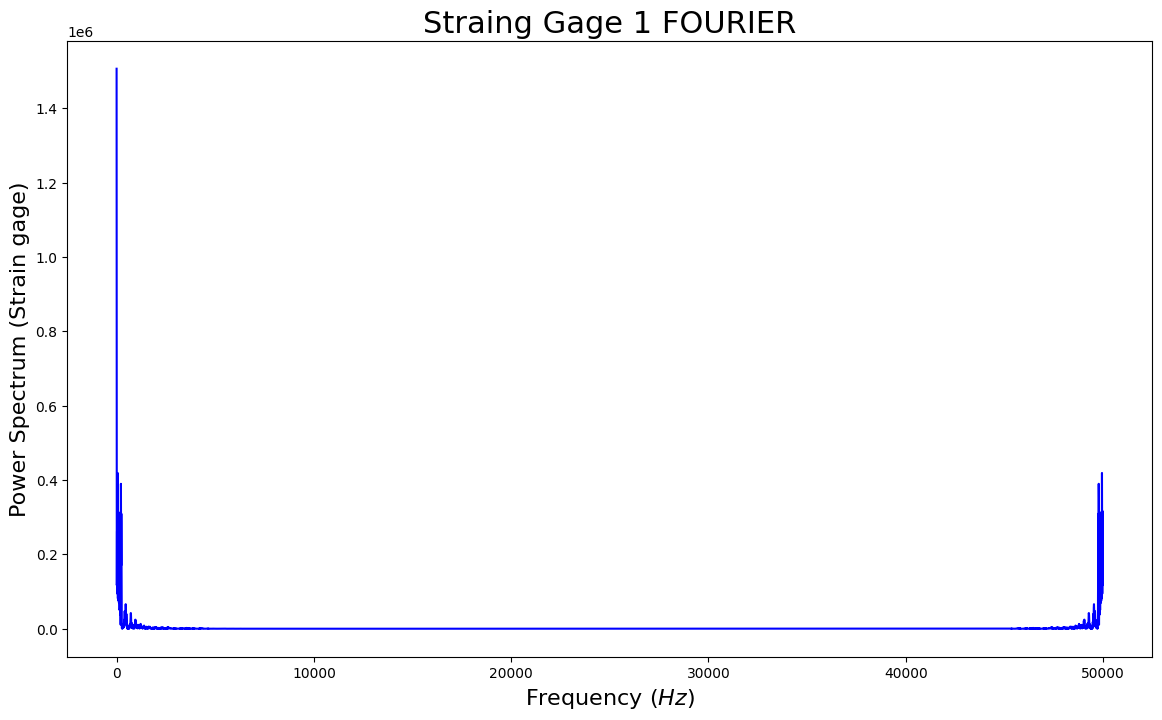

In [11]:
# 
figsize_fourier = (14, 8)
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Frequency $(Hz)$'

fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Straing Gage 1 FOURIER"
ylabel = r'Power Spectrum (Strain gage)'

plot_1signal(ax, S1_freqs, S1_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

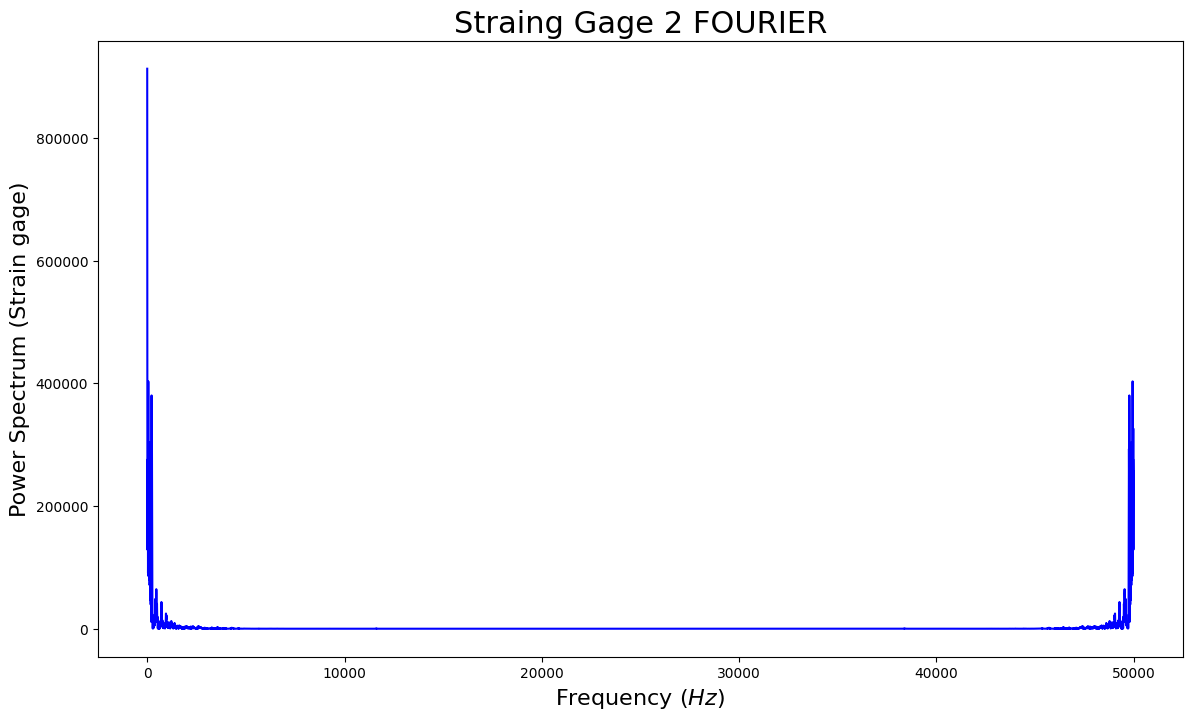

In [12]:
fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Straing Gage 2 FOURIER"
ylabel = r'Power Spectrum (Strain gage)'

plot_1signal(ax, S2_freqs, S2_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

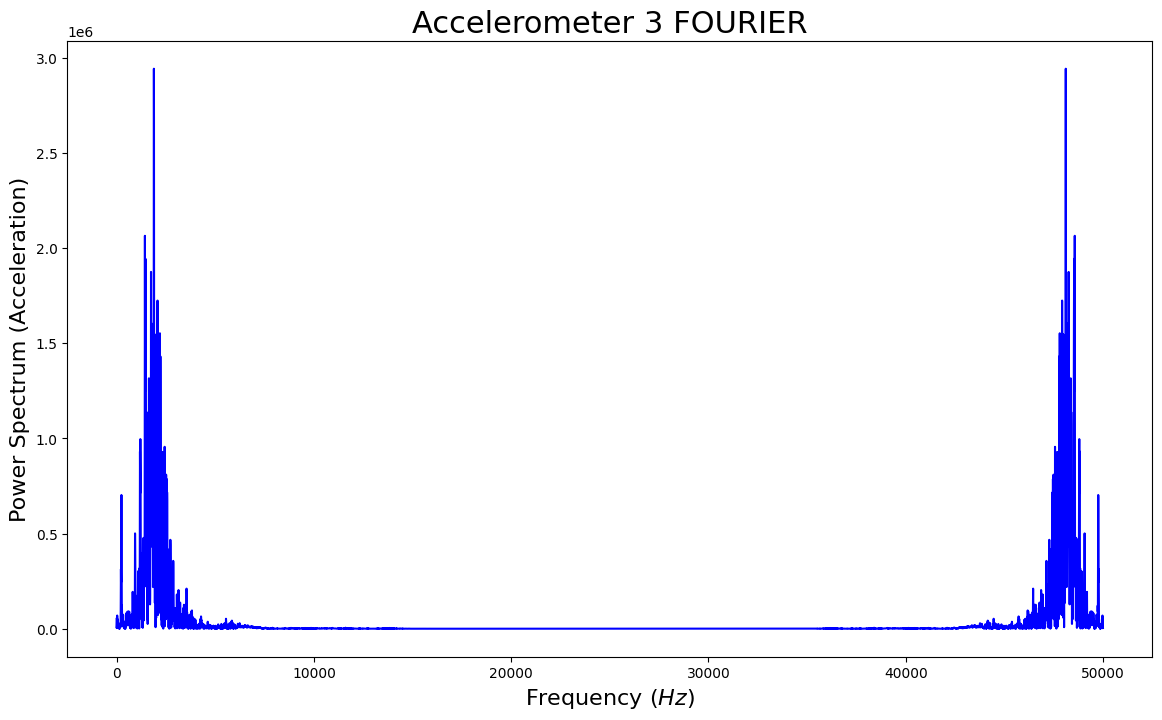

In [13]:
fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Accelerometer 3 FOURIER"
ylabel = r'Power Spectrum (Acceleration)'

plot_1signal(ax, A3_freqs, A3_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

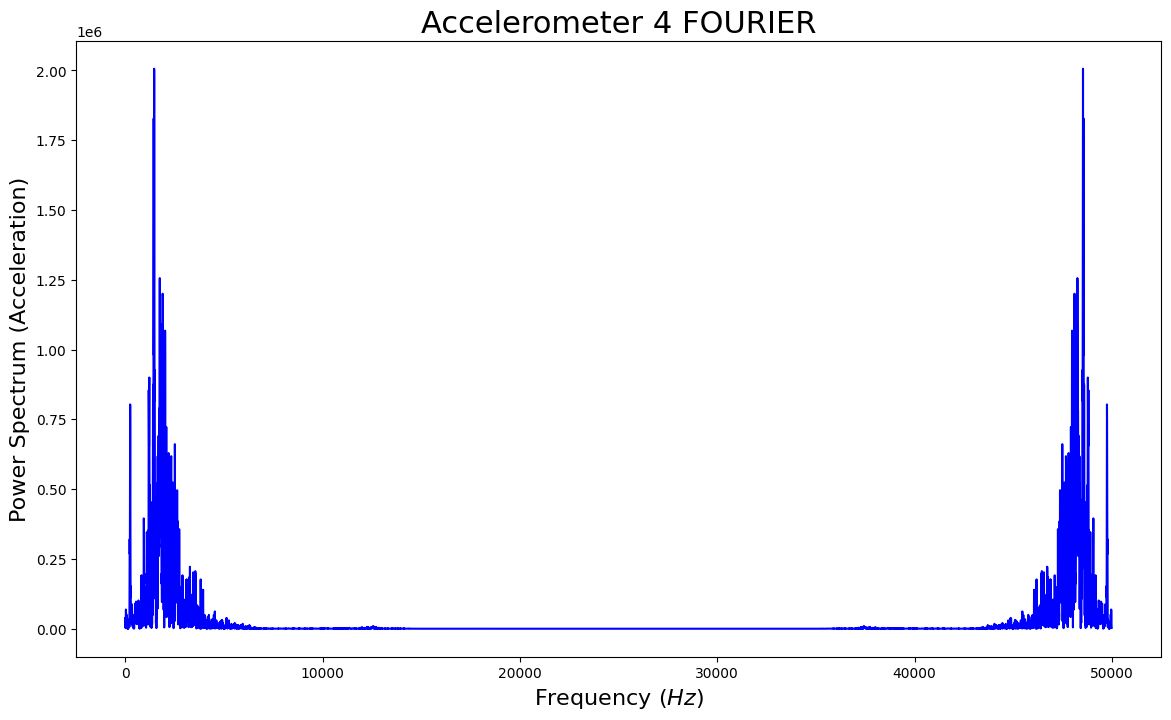

In [14]:
fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Accelerometer 4 FOURIER"
ylabel = r'Power Spectrum (Acceleration)'

plot_1signal(ax, A4_freqs, A4_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Velocity Function

In [15]:
def velocity(acel, sampling_rate):
    tr_a = Trace(data=np.array(acel)*9.81)
    tr_a.stats.sampling_rate = sampling_rate
    tr_v = tr_a.copy()
    tr_v.integrate(method = "cumtrapz")
    return tr_v

In [16]:
tr_v3 = velocity(A3, sampling_rate)
tr_v4 = velocity(A4, sampling_rate)

### Plotting Velocities

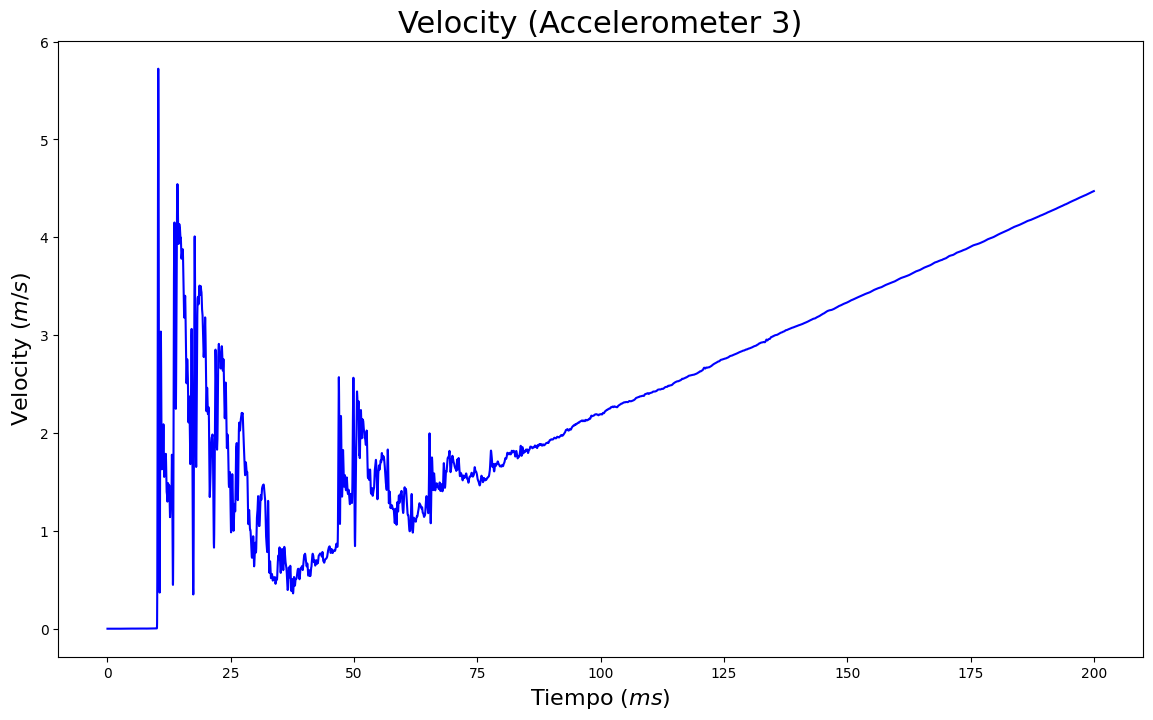

In [17]:
# 
figsize_velocity = (14, 8)
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Tiempo $(ms)$'

fig, ax = plt.subplots(1, 1, figsize = figsize_velocity)
title = "Velocity (Accelerometer 3)"
ylabel = r'Velocity $(m/s)$'

plot_1signal(ax, t_ms, tr_v3.data, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

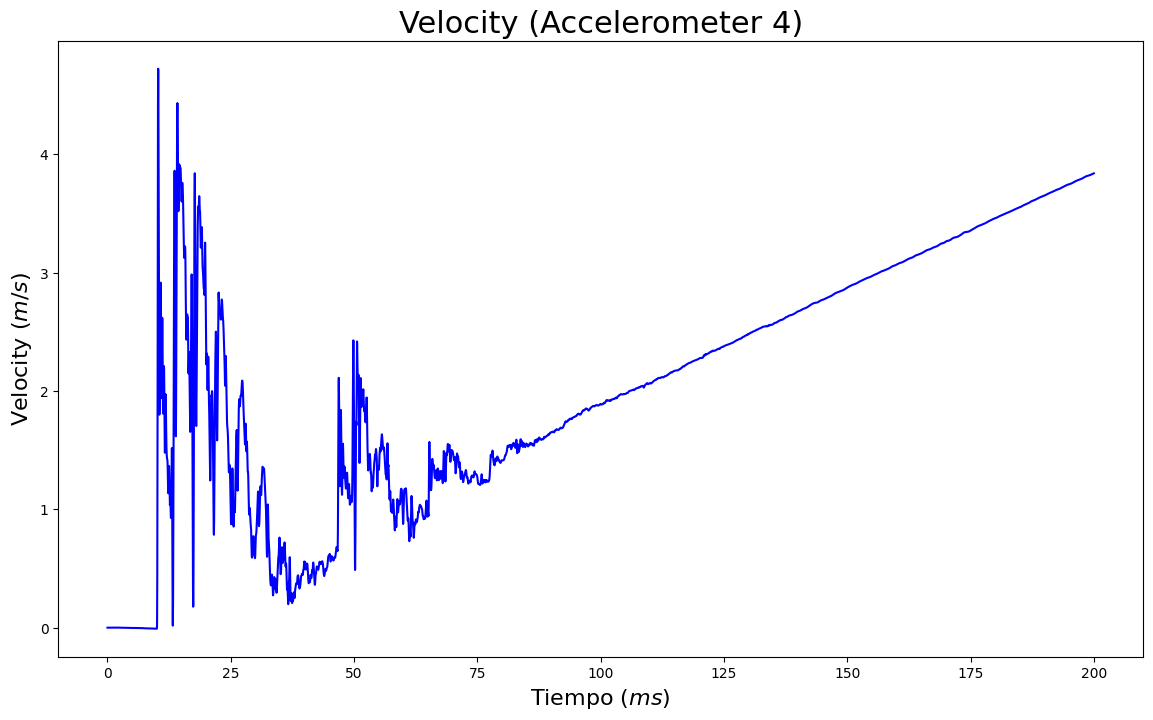

In [18]:
fig, ax = plt.subplots(1, 1, figsize = figsize_velocity)
title = "Velocity (Accelerometer 4)"
ylabel = r'Velocity $(m/s)$'

plot_1signal(ax, t_ms, tr_v4.data, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Fast Fourier Transform for Velocities

In [19]:
V3_fourier_signal, V3_freqs, V3_psd = fast_fourier_analysis(tr_v3.data, T = T)
V4_fourier_signal, V4_freqs, V4_psd = fast_fourier_analysis(tr_v4.data, T = T)

### Plotting Fourier of Velocities

C:\Users\Jose\anaconda3\envs\kallpa_v1\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


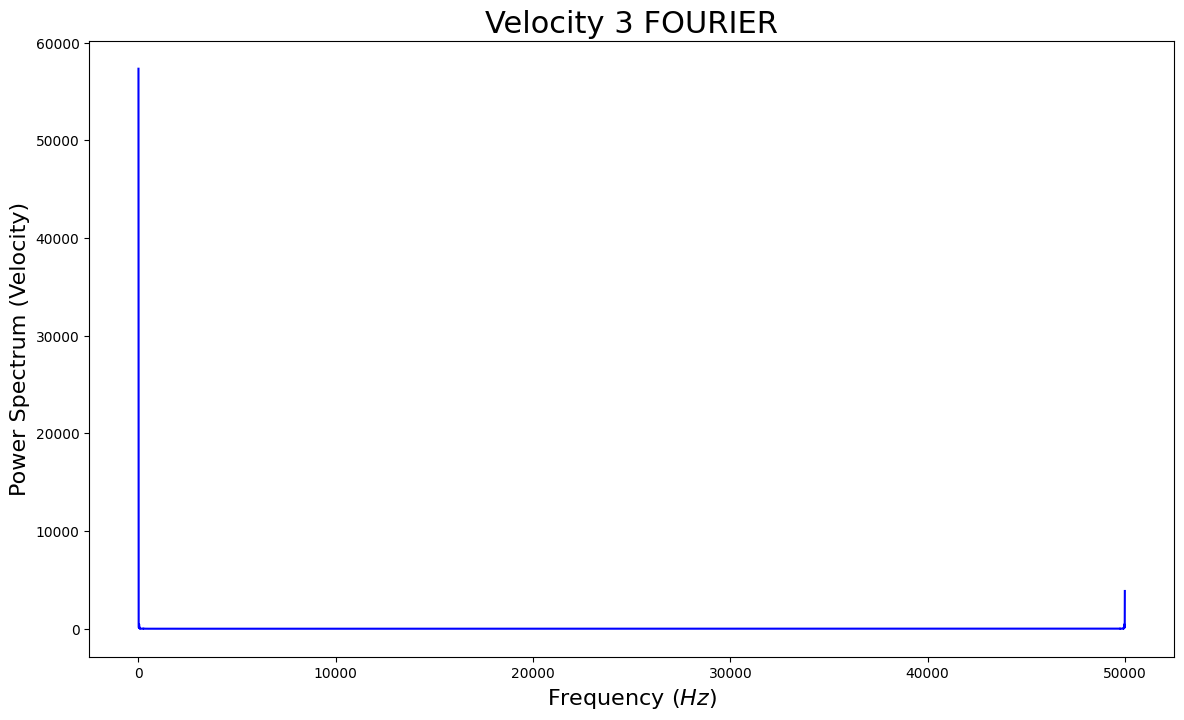

In [20]:
# 
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Frequency $(Hz)$'

fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Velocity 3 FOURIER"
ylabel = r'Power Spectrum (Velocity)'

plot_1signal(ax, V3_freqs, V3_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

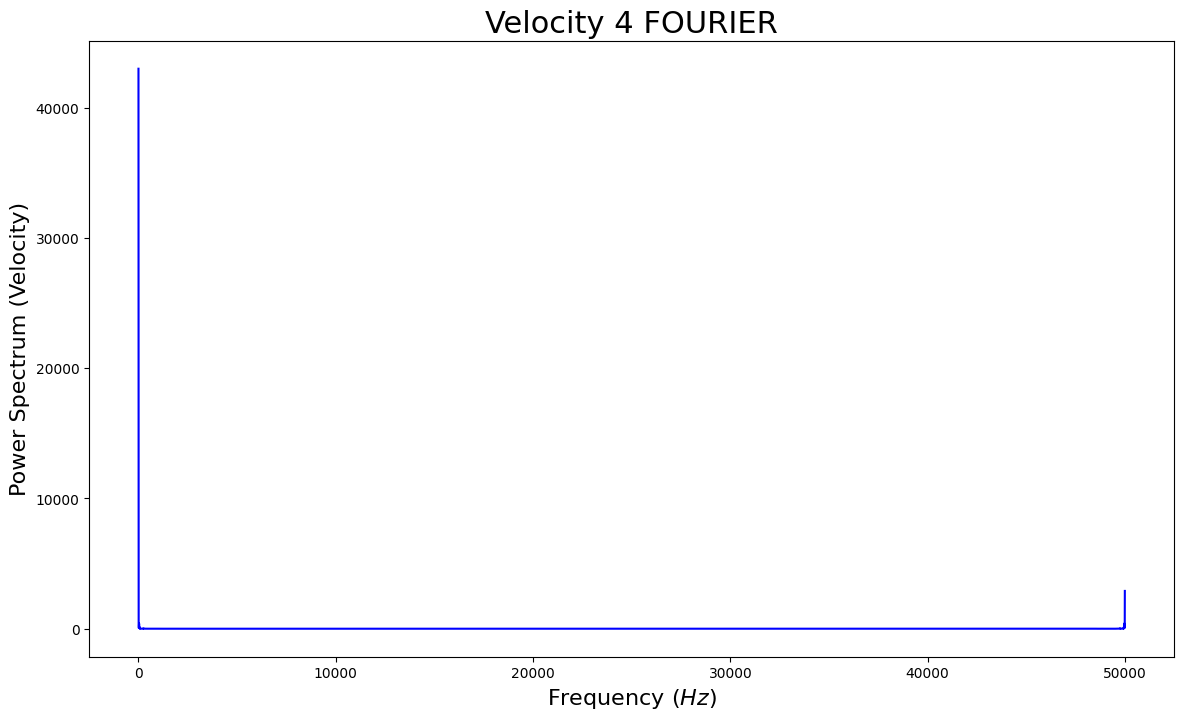

In [21]:
fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Velocity 4 FOURIER"
ylabel = r'Power Spectrum (Velocity)'

plot_1signal(ax, V4_freqs, V4_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Filtering velocity

In [22]:
filtered_tr_v3 = tr_v3.copy()
filtered_tr_v4 = tr_v4.copy()

In [23]:
filtered_tr_v3.filter(type="highpass",freq=60)
filtered_tr_v4.filter(type="highpass",freq=60)

... | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:00.199980Z | 50000.0 Hz, 10000 samples

### Plotting Filtered Velocities

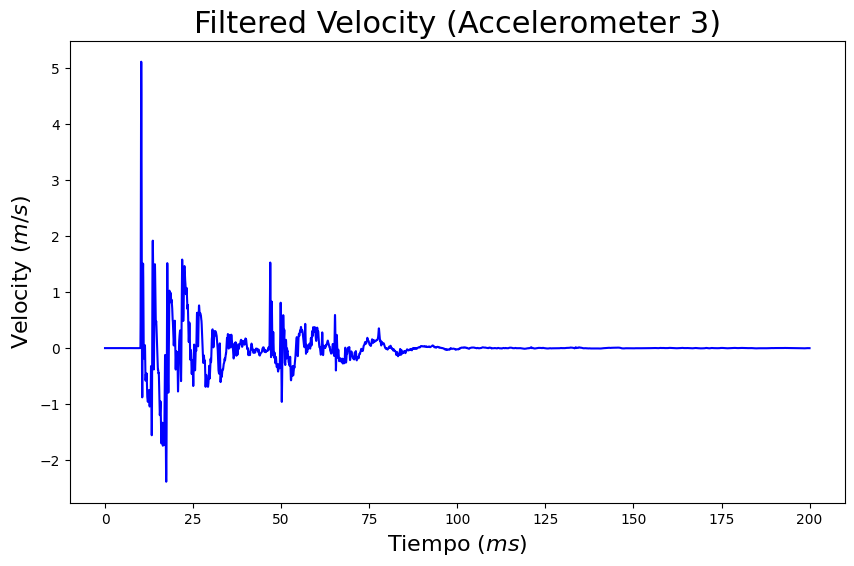

In [24]:
# 
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Tiempo $(ms)$'

fig, ax = plt.subplots(1, 1)
title = "Filtered Velocity (Accelerometer 3)"
ylabel = r'Velocity $(m/s)$'

plot_1signal(ax, t_ms, filtered_tr_v3.data, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Fast Fourier Transform for Velocities

In [25]:
filtered_V3_fourier_signal, filtered_V3_freqs, filtered_V3_psd = fast_fourier_analysis(filtered_tr_v3.data, T = T)

### Plotting Fourier of Filtered Velocities

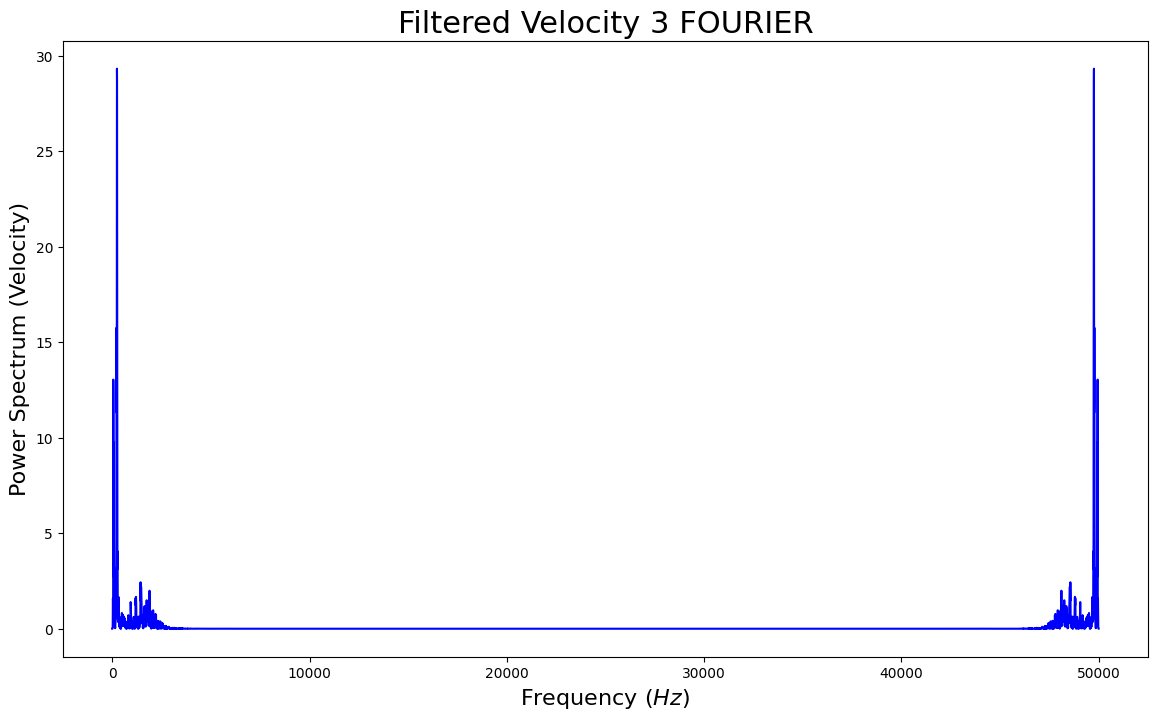

In [26]:
# 
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Frequency $(Hz)$'

fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Filtered Velocity 3 FOURIER"
ylabel = r'Power Spectrum (Velocity)'

plot_1signal(ax, filtered_V3_freqs, filtered_V3_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Filtering Velocity 2nd Method

In [39]:
filtered2_V3_fourier_signal, filtered2_V3_freqs, filtered2_V3_psd = fast_fourier_analysis(tr_v3.data, T = T)

In [52]:
indices = filtered2_V3_psd < 5
filtered2_V3_psd = filtered2_V3_psd * indices
filtered2_V3_fourier_signal = filtered2_V3_fourier_signal * indices
filtered2_tr_v3 = np.fft.ifft(filtered2_V3_fourier_signal)

In [53]:
filtered2_V3_psd

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

### Plotting Filtering 2 velocties

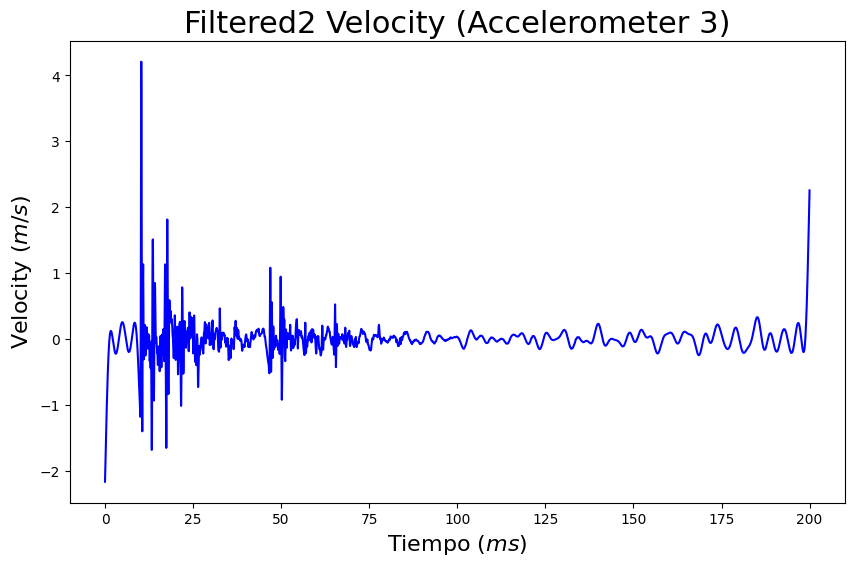

In [54]:
# 
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Tiempo $(ms)$'

fig, ax = plt.subplots(1, 1)
title = "Filtered2 Velocity (Accelerometer 3)"
ylabel = r'Velocity $(m/s)$'

plot_1signal(ax, t_ms, filtered2_tr_v3, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)

### Plotting Fourer of Filtered2 Velocities

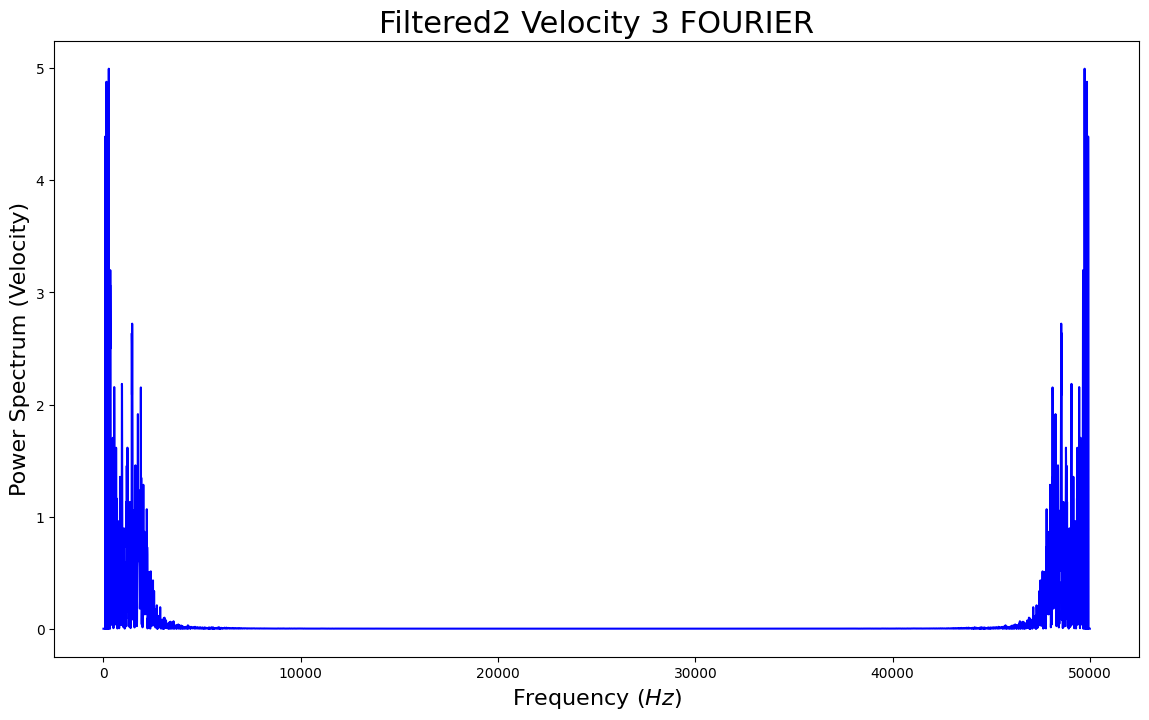

In [55]:
# 
fontsize_title = 22
fontsize_xlabel = 16
fontsize_ylabel = 16
xlabel = r'Frequency $(Hz)$'

fig, ax = plt.subplots(1, 1, figsize = figsize_fourier)
title = "Filtered2 Velocity 3 FOURIER"
ylabel = r'Power Spectrum (Velocity)'

plot_1signal(ax, filtered2_V3_freqs, filtered2_V3_psd, title = title,
                       xlabel = xlabel,
                       ylabel = ylabel,
                       fontsize_title = fontsize_title,
                       fontsize_xlabel = fontsize_xlabel,
                       fontsize_ylabel = fontsize_ylabel)